# This Feature Selection project was done as a part of my screening process for ABAL Research Labs (https://www.abalresearch.com) during the fall of 2019.

##### I was provided an accounting dataset from Compustat Quarterly, and was to told to perform feature selection so that the dataset can be used by other statistians and RAs working as ABAL to build models. This code was written in September 2019.

## Feature selection or attribute selection is the process of choosing features or attributes that are relevant to the problem at hand. It is done :

1. to simplify the dataset and insrease understanding of the problem
2. to reduce training and computation time of the models
3. to evade the curse of dimensionality

(Wiki: https://en.wikipedia.org/wiki/Feature_selection)

First order of business is importing necessary libraries, reading and evaluating the data.

In [34]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("ReduceData.csv")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,22,375,376) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [3]:
df.head()

,GVKEY,DATADATE,FYEAR,TIC,DLRSN,FYRC,GIND,NAICS,SPCINDCD,SPCSECCD,...,PRCH_C,PRCH_F,PRCL_C,PRCL_F,CONSOL,INDFMT,DATAFMT,POPSRC,CURCD,COSTAT
0,1004,20110531,2010,AIR,NaN,5,201010.0,423860.0,110.0,925.0,...,28.61,29.05,14.91,14.91,C,INDL,STD,D,USD,A
1,1004,20120531,2011,AIR,NaN,5,201010.0,423860.0,110.0,925.0,...,31.66,31.66,14.96,12.02,C,INDL,STD,D,USD,A
2,1004,20130531,2012,AIR,NaN,5,201010.0,423860.0,110.0,925.0,...,23.67,20.87,10.00,10.00,C,INDL,STD,D,USD,A
3,1004,20140531,2013,AIR,NaN,5,201010.0,423860.0,110.0,925.0,...,31.55,31.55,16.02,19.98,C,INDL,STD,D,USD,A
4,1004,20150531,2014,AIR,NaN,5,201010.0,423860.0,110.0,925.0,...,31.41,34.24,22.37,22.37,C,INDL,STD,D,USD,A


As it can be seen below that there are 448 features or attributes in the dataset. The data has integer, floating point and 'O' type values. 'O' type values are bacically Strings as can be seen in a cell below with attribute ("DATAFMT").

In [35]:
df.shape

(374365, 419)

In [5]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
# df.iloc[[i],[j]]
# here i is the row and j is the column.
# note that the index are starting from 0 after excluding the first column

print(df["SPCINDCD"])
print("---------")

df["SPCINDCD"].dtype

0         110.0
1         110.0
2         110.0
3         110.0
4         110.0
          ...  
374360    380.0
374361    380.0
374362    380.0
374363    380.0
374364    380.0
Name: SPCINDCD, Length: 374365, dtype: float64
---------


dtype('float64')

In [7]:
print(df["DATAFMT"])
print("---------")

df["DATAFMT"].dtype

0         STD
1         STD
2         STD
3         STD
4         STD
         ... 
374360    STD
374361    STD
374362    STD
374363    STD
374364    STD
Name: DATAFMT, Length: 374365, dtype: object
---------


dtype('O')

### For feature selection, I referred a blog (https://www.knime.com/blog/seven-techniques-for-data-dimensionality-reduction).

The entire project was done in 4 phases.

#### Principal Component Analysis (PCA) was not used here for dimensionality reduction. This is because, PCA takes a bunch of features and return a new set of reduced features. Since interpretability of original features had to be maintained, PCA wasn't taken into consideration.

#### [1] First of all, features having a constant value throughout the dataset are dropped from the dataframe df

In [8]:
column_list = []
for i in df.columns:
    column_list.append(i)
print(len(column_list))  
print("-----------------")
constant_columns = []
c=0
for i in column_list:
    if len(df[i].unique()) == 1:
        c=c+1
        constant_columns.append(i)
print(constant_columns)
print(c)  



448
-----------------
['DPTC', 'FDFR', 'FFS', 'IST', 'IVPT', 'LCAO', 'LCUACU', 'NPAORE', 'NPAT', 'RAGR', 'RCL', 'RPAG', 'STBO', 'STIO', 'TDST', 'TRANSA', 'VPO', 'AMGW', 'CFPDO', 'NIINT', 'PCL', 'RIS', 'XAGT', 'XS', 'XT', 'CONSOL', 'INDFMT', 'DATAFMT', 'POPSRC']
29


In [9]:
df.shape

(374365, 448)

Dataframe df is left with 419 features

In [10]:
# These 29 columns have a constant value throughout the entire file.
# Hence, they can be removed from the dataset

# 448 - 29 = 419 (Columns/Attributes/Features)

df = df.drop(columns = constant_columns)
print(df.shape)

(374365, 419)


#### [2] Features which are strings are dropped from the dataframe. This is done because clustering algorithms like KNN won't be able to incorporate the string types becasue we cannot quantify strings.

In [11]:
#Now we'll remove the columns that are not interger or floating point

list_obj_dtype = []
for i in df:
    if df[i].dtype != "int64" and df[i].dtype != "float64":
#        print(str(df[i].dtype) + "   " + str(i))
        list_obj_dtype.append(i)
    
print(list_obj_dtype)
df2 = df.drop(columns = list_obj_dtype)

['TIC', 'SPCSRC', 'ACCTCHG', 'ACCTSTD', 'ACQMETH', 'OGM', 'CEOSO', 'CFOSO', 'CURCD', 'COSTAT']


As is can be seen below, another 10 features are removed and new dataframe "df2" is left with 409 features.

In [12]:
df2.shape

(374365, 409)

#### Imputation

Imputation is the process of replacing missing values with substituted data.
Here, I am replacing all NaN and Infinite values with the mean of that particular feature. 

In [13]:
np.isnan(df2)

,GVKEY,DATADATE,FYEAR,DLRSN,FYRC,GIND,NAICS,SPCINDCD,SPCSECCD,STKO,...,DVPSP_F,DVPSX_C,DVPSX_F,MKVALT,PRCC_C,PRCC_F,PRCH_C,PRCH_F,PRCL_C,PRCL_F
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374360,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
374361,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
374362,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
374363,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [14]:
df3 = df2.fillna(df2.mean())

In [15]:
np.isnan(df3)

,GVKEY,DATADATE,FYEAR,DLRSN,FYRC,GIND,NAICS,SPCINDCD,SPCSECCD,STKO,...,DVPSP_F,DVPSX_C,DVPSX_F,MKVALT,PRCC_C,PRCC_F,PRCH_C,PRCH_F,PRCL_C,PRCL_F
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
374361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
374362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
374363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df4 = df3.replace([np.inf, -np.inf], np.nan)
df4 = df4.fillna(df4.mean())
df4 = df4.round(4)
df4.shape


(374365, 409)

In [19]:
df4.isnull().values.any()

False

#### The dataframe "df4" is used from this point forward.

#### [3] Variance filtering is performed by keeping the threshold value of 0.1 

Only 2 features were filtered out by this approach. Those 2 features were important as mentioned in the problem statement, hence the code below is commented out.

In [ ]:
# train_feat, test_feat, train_lab, test_lab = train_test_split(df4, df4, test_size = 0.1, random_state = 31)
# const_filter = VarianceThreshold(threshold = 0.1)
# const_filter.fit(train_feat)
# len(train_feat.columns[const_filter.get_support()])
# low_filter_column = train_feat.columns[const_filter.get_support()]
# low_filter_column.shape

# quasi_filter = VarianceThreshold(threshold = 0.02)
# quasi_filter.fit(train_feat)

#### [4] Coorelation filtering is the last step. For this, a heatmap is plotted for the dataframe "df4" using seaborn library. Default correlation used by pandas is Pearson Correlation.

In [20]:
import seaborn as sb

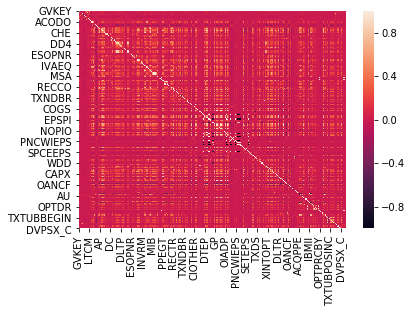

In [21]:
df_corr = df4.corr()
sb.heatmap(df_corr)

In [22]:
df_corr.shape

(409, 409)

Here, the code is traversing the correlation matrix and marking false for the features that carry simiilar kind of information and have correlation value of more than 0.9.

Then, I have create a new dataframe "dataj" and copied its content to a csv file as the final output.

In [23]:
#creating a pre_final_columns array
pre_final_columns = np.full((df_corr.shape[0],), True, dtype=bool)

#since correlation matrix is skew symmetric, we dont need to visit all the indexes
#hence the second loop is starting from i+1

for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if (df_corr.iloc[i,j] > 0.9):
            if pre_final_columns[j] == True:
                pre_final_columns[j] = False
                
final_columns = df4.columns[pre_final_columns]
dataj = df4[final_columns]

In [25]:
print(final_columns)
dataj.shape


Index(['GVKEY', 'DATADATE', 'DLRSN', 'FYRC', 'GIND', 'NAICS', 'SPCINDCD',
       'SPCSECCD', 'STKO', 'DLDTE',
       ...
       'TXTUBXINTBS', 'TXTUBXINTIS', 'NAICSH', 'SICH', 'ADJEX_C', 'CSHTR_C',
       'DVPSP_C', 'DVPSX_C', 'MKVALT', 'PRCC_C'],
      dtype='object', length=293)


(374365, 293)

In [26]:
dataj.head()

,GVKEY,DATADATE,DLRSN,FYRC,GIND,NAICS,SPCINDCD,SPCSECCD,STKO,DLDTE,...,TXTUBXINTBS,TXTUBXINTIS,NAICSH,SICH,ADJEX_C,CSHTR_C,DVPSP_C,DVPSX_C,MKVALT,PRCC_C
0,1004,20110531,3.6343,5,201010.0,423860.0,110.0,925.0,0.0,2.001030e+07,...,16.8683,1.6582,423860.0,5080.0,1.0,88443622.0,0.000,0.000,1049.8206,27.47
1,1004,20120531,3.6343,5,201010.0,423860.0,110.0,925.0,0.0,2.001030e+07,...,16.8683,1.6582,423860.0,5080.0,1.0,80676553.0,0.225,0.225,485.2897,19.17
2,1004,20130531,3.6343,5,201010.0,423860.0,110.0,925.0,0.0,2.001030e+07,...,16.8683,1.6582,423860.0,5080.0,1.0,85991627.0,0.300,0.300,790.0029,18.68
3,1004,20140531,3.6343,5,201010.0,423860.0,110.0,925.0,0.0,2.001030e+07,...,16.8683,1.6582,423860.0,5080.0,1.0,68957400.0,0.300,0.300,961.3080,28.01
4,1004,20150531,3.6343,5,201010.0,423860.0,110.0,925.0,0.0,2.001030e+07,...,16.8683,1.6582,423860.0,5080.0,1.0,71466584.0,0.300,0.300,1046.3954,27.78


In [29]:
dataj.to_csv("Reduced_Features_Final.csv")

In [30]:
df.shape

(374365, 419)

In [31]:
dataj.shape

(374365, 293)